# Quantum Logic Gate and Rotation
Quantum computations mainly manipulate the state of a qubit using rotation.   
Check the overview.

## Qubit and quantum states
one qubit can be represented as a point on a sphere.  
A quantum computer is not constrained by 0 and 1 and can take any point on a sphere called a Bloch sphere.

This data is called a quantum state and is mainly represented by $\mid \psi \rangle$. $\mid .\rangle$ is a vertical vector.  
|0> and |1> are assigned vectors like the following, respectively.

$$
\mid 0 \rangle = \begin{bmatrix}1\\0\end{bmatrix}, \mid 1 \rangle = \begin{bmatrix}0\\1\end{bmatrix}
$$

|ψ> can be defined by using |0> and |1>.

$$
\mid \psi \rangle = \alpha \mid 0 \rangle + \beta \mid 1 \rangle = \alpha \begin{bmatrix}1\\0\end{bmatrix} + \beta \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}\alpha \\ \beta \end{bmatrix}
$$

It is called a state vector.

## Initial state and rotation （quantum gate）
The initial state is as follows.

$$
\mid 0 \rangle = \begin{bmatrix}1\\0\end{bmatrix}
$$

In order to change the quantum state, a rotate operation is used. It called a quantum gate.  
The Bloch sphere has three axes, XYZ. Quantum gates is such rotational operations around an axis.

The basic rotation operation is the X, Y, and Z gates.  
Each corresponds to a rotation of 180 degrees (π) around the x, y, and z axes.

$$
X=
\begin{bmatrix}
0&1 \\
1&0
\end{bmatrix},
Y=
\begin{bmatrix}
0&-i \\
i&0
\end{bmatrix},
Z=
\begin{bmatrix}
1&0 \\
0&-1
\end{bmatrix}
$$

# Operation on Qubits
## basic 1qubit operations
Here we start from the basic learing about quantum computing. If you haven't install blueqat SDK please install first.

In [ ]:
!pip install blueqat

## Step1: Prepare basic circuit
To calculate on the quantum computer, we just make a circuit.
Let's import main component of blueqat and initialize the circuit first.

In [4]:
from blueqat import Circuit

#initialization of circuit
Circuit()

Circuit(0).

## Step2: Operate quantum logic gate
Next we put some quantum logic gate on the circuit
Let's put quantum logic gate connecting with chain method after the initialized circuit. The .x[0] shows we apply Xgate on the 0th qubit.

In [5]:
Circuit().x[0]

Circuit(1).x[0]

## Step3: Measurement and run
To get the result of this circuit, we have to measure the result of the circuit. Let's put the measurement gate as .m[:] (: shows we apply measurement gate to all of qubits). And .run() with the number of shots we can get the final result.

In [6]:
Circuit().x[0].m[:].run(shots=1)

Counter({'1': 1})

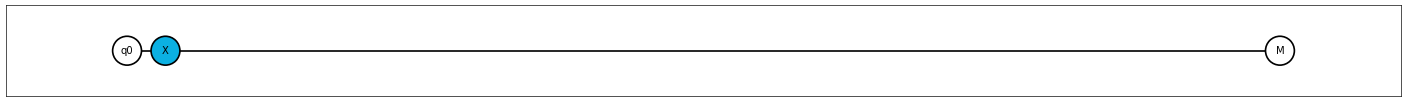

In [7]:
Circuit().x[0].m[:].run(backend="draw")

Now we get the result of '1' once. This is the result. Usually the circuit start from 0 and applying Xgate, this gate flip the bit of qubits 0 <-> 1, so you get 1 finally.

## Advanced: State vector
For more advanced use of the circuit, we can get the state amplitude (probability distribution) from the state vector. We can get the state vector directly from the simulator with just .run() the circuit without measurement.

In [4]:
Circuit().h[0].run()

array([0.70710678+0.j, 0.70710678+0.j])

This is the state vector.

## basic 2qubits operations
Here we learn about basic 2qubits operation, by using 2qubits operation we can make much more complicated calculation on quantum logic circuit.

## Step1: Initialize, create circuit and run
The basic preparation is the same as the 1qubit operation. Let's put CX gate this time.

In [9]:
Circuit().cx[0,1].m[:].run(shots=1)

Counter({'00': 1})

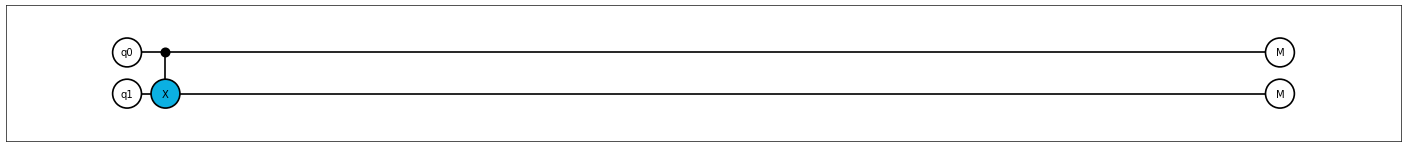

In [10]:
Circuit().cx[0,1].m[:].run(backend="draw")

Now we get the result of '00' once. 00 means that 2qubits are both 0.

## About CX gate
CX quantum logic gate is so called CNOT gate. This time we have 2qubits to use.
One is called "controlled gate" and another is "target gate". Only when the controlled gate is '1' the target gate flips. If the controlled gate is '0' nothing happens.

This time we have both qubits initialized to 0 so nothing happen after the CX gate applied.

## CX gate again
Let's see if the controlled gate is 1. Applying .x[0] gate to the 0th qubits and after we apply cx gate to 0th and 1st qubit.


In [6]:
Circuit().x[0].cx[0,1].m[:].run(shots=1)

Counter({'11': 1})

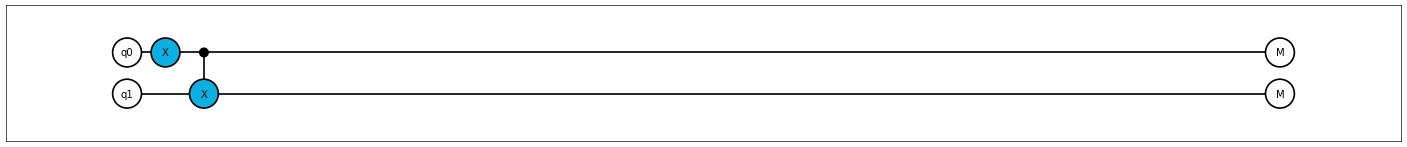

In [11]:
Circuit().x[0].cx[0,1].m[:].run(backend="draw")

Now we have result of '11'. First the circuit flips the 0th qubit with .x[0] gate and then the .cx[0,1] gate flips 1st qubit 0 to 1 because the controlled gate on 0th qubit is 1. Finally we get both qubit as 1.

## Advanced topic: initialized circuit with number of qubits
Usually the circuit automatically specify the number of qubits used in the circuit, we can specify the number of qubit first and then make the circuit.

In [7]:
Circuit(3).x[0].cx[0,1].m[:].run(shots=1)

Counter({'110': 1})

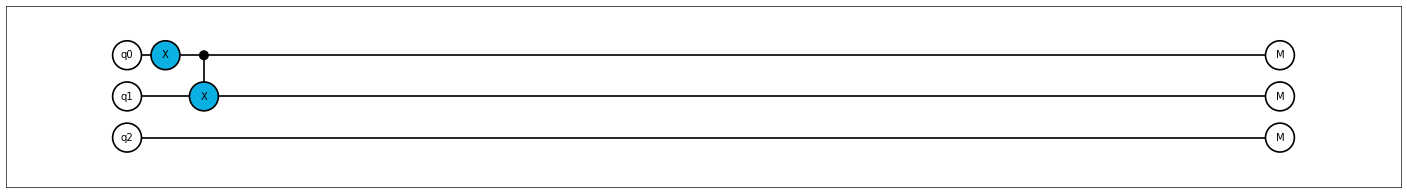

In [12]:
Circuit(3).x[0].cx[0,1].m[:].run(backend="draw")

Just put the number of qubits in the Cirucit(). This time 3qubits prepare and just two of them used.

# Quantum algorithm

### Overview

An algorithm generally refers to a procedure that a computer performs in order to solve a certain problem.

A quantum algorithm is an algorithm that is designed to be run on a quantum computer.  
It is often described by mathematical expression using bracket symbols, but eventually it is reduced to a quantum circuit using concrete quantum gates.  

The aim of quantum algorithms is to perform calculations that are faster than classical computers, or that are virtually impossible with classical computers due to physical constraints (e.g., memory capacity) using quantum computers.  
This is achieved by utilizing the superposition and entanglement properties of qubits.  
Unlike (classical) qubits, $n$ qubits can hold $2^n$ superposition states simultaneously.  

At first glance, it is tempting to think that $2^n$ of calculations can be performed in parallel, but unfortunately it is not so simple.  
This is because in a quantum computer, only one of the $2^n$ states is probabilistically output by the "measurement" process.  
In other words, a quantum computer can hold a huge amount of information internally, but the information it can output is very limited.  
Therefore, quantum algorithms need to be designed to be good at obtaining the desired solution with a small number of outputs.  

Currently, there are only a very limited number of calculations where quantum algorithms have been shown to be faster than classical algorithms.  
Included in that limited number of examples are the famous Shor's and Grover's algorithms.  
In the process of learning these algorithms, I think you will be able to grasp the kind of calculations in which a quantum computer is likely to have an advantage over a classical computer.　　
The discovery of new computations that will make quantum algorithms faster will be the driving force behind the use of quantum computers in the future.

### NISQ algorithm

Current (2021) quantum computers are still small in scale and the impact of noise on computational results cannot be ignored. Such quantum computers are distinguish as Noisy Intermediate-Scale Quantum (NISQ) devices [1].  
Quantum algorithms that have been theoretically shown to be faster than classical algorithms, such as those described above, cannot be run on NISQ devices at a practical scale and accuracy.  
It is said that it will take several decades to develop a quantum computer that can do this (Learge scale, fault tolerant quantum computer).

On the other hand, the largest current NISQ devices, as announced as "quantum transcendence", have reached a point where they cannot be efficiently simulated by existing classical computers [2].  
Therefore, even if we do not wait for several decades, we expect that there will be calculations that can be performed faster than existing classical computers using NISQ devices.  
Such an algorithm is called the NISQ algorithm, and a research and development race is currently underway around the world.

### On learning NISQ and non-NISQ algorithms
In the following tutorials, a distinction will be made between non-NISQ algorithms ("Universal Quantum Algorithm") and NISQ algorithms.  
The basic construction of a quantum circuit and the quantum gates used are the same for both.  
Compared to non-NISQ algorithms, the NISQ algorithm emphasizes the ability to operate with a small number of qubits and to tolerate errors in computation.

I think that non-NISQ quantum algorithms are better for learning, in point of seeing how quantum computation can be faster than classical computation.　　
On the other hand, if you want to focus on practical use in the near future, it is better to focus on the NISQ algorithm.

### References

[1] Bharti, Kishor, et al. "Noisy intermediate-scale quantum (NISQ) algorithms." arXiv preprint arXiv:2101.08448 (2021).  
[2] Arute, Frank, et al. "Quantum supremacy using a programmable superconducting processor." Nature 574.7779 (2019): 505-51